Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


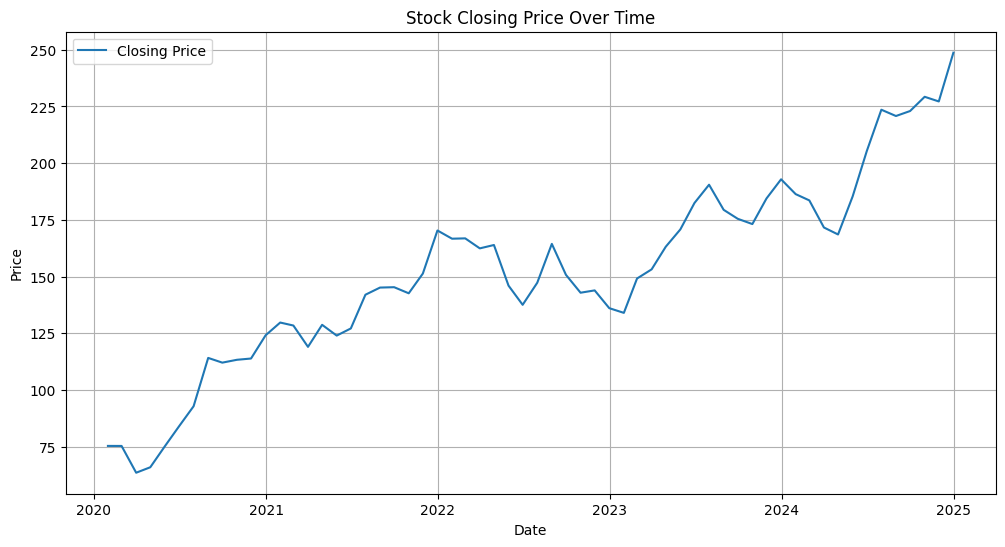

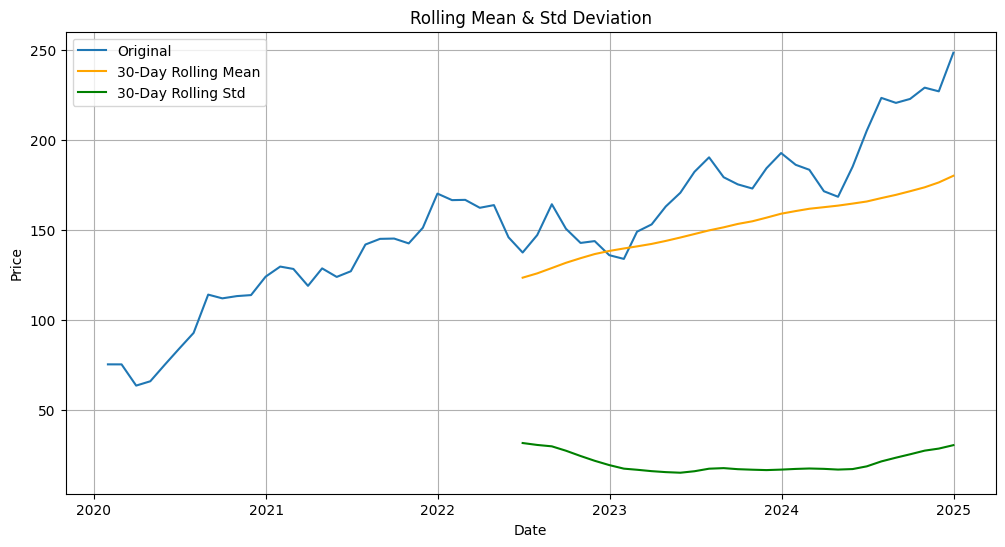

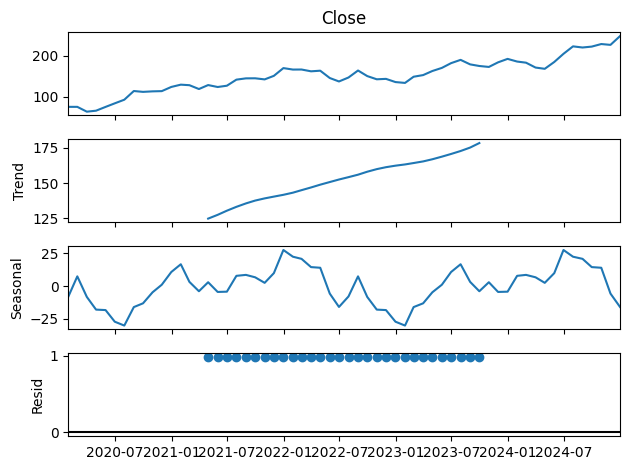

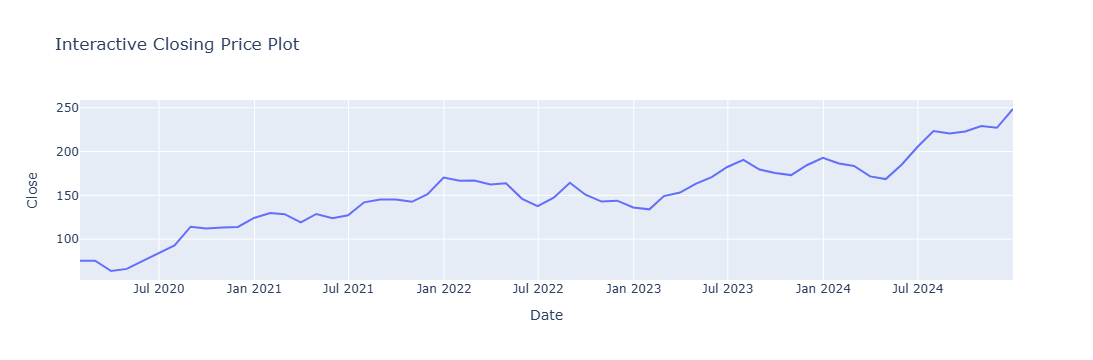

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the dataset
df = pd.read_csv('../data/raw/AAPL_1d.csv',skiprows=2)

#Rename Columns
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume'] 

# Parse dates and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isnull().sum())

# Resample to monthly mean
monthly_df = df['Close'].resample('ME').mean()

# plots
plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Closing Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
# Save the closing_price plot
plt.savefig('../reports/plots/closing_price.png', dpi=300)  
plt.show()

rolling_mean = monthly_df.rolling(window=30).mean()
rolling_std = monthly_df.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(monthly_df, label='Original')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='green')
plt.title("Rolling Mean & Std Deviation")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
# Save the plot(Rolling Mean & Std Deviation)
plt.savefig('../reports/plots/rolling_mean_std.png', dpi=300)  
plt.show()

# Perform decomposition
result = seasonal_decompose(monthly_df, model='additive', period=30)  # adjust period as per your data
result.plot()
plt.tight_layout()
plt.savefig('../reports/plots/decomposition_close.png', dpi=300)
plt.show()

fig = px.line(monthly_df, x=monthly_df.index, y='Close', title='Interactive Closing Price Plot')
fig.show()

# df.head()